# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("previsao_de_renda.csv")
df['data_ref'] = pd.to_datetime(df['data_ref'])
 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   index                  15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12466 non-null  float64       
 13  q

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


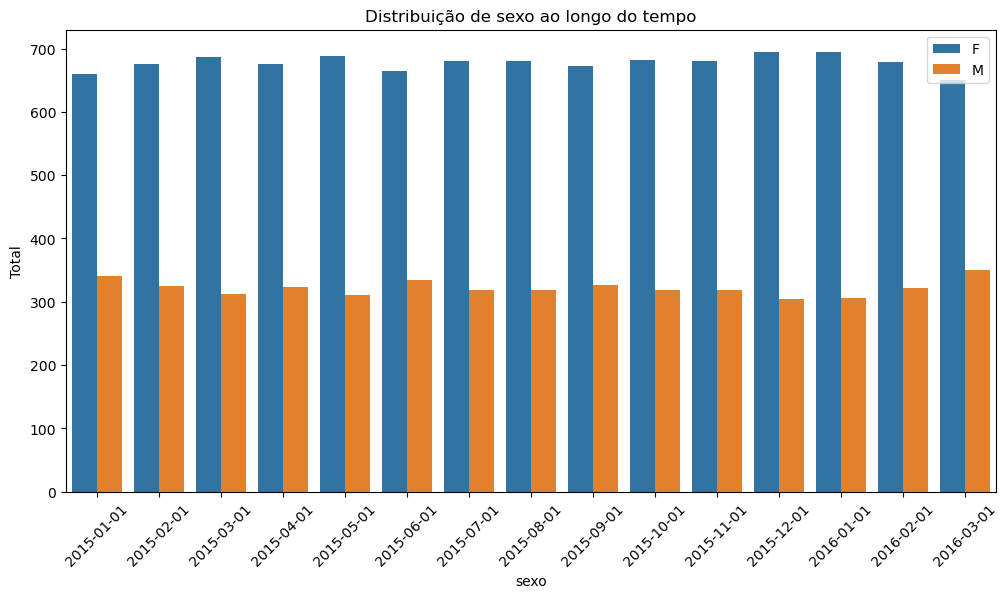

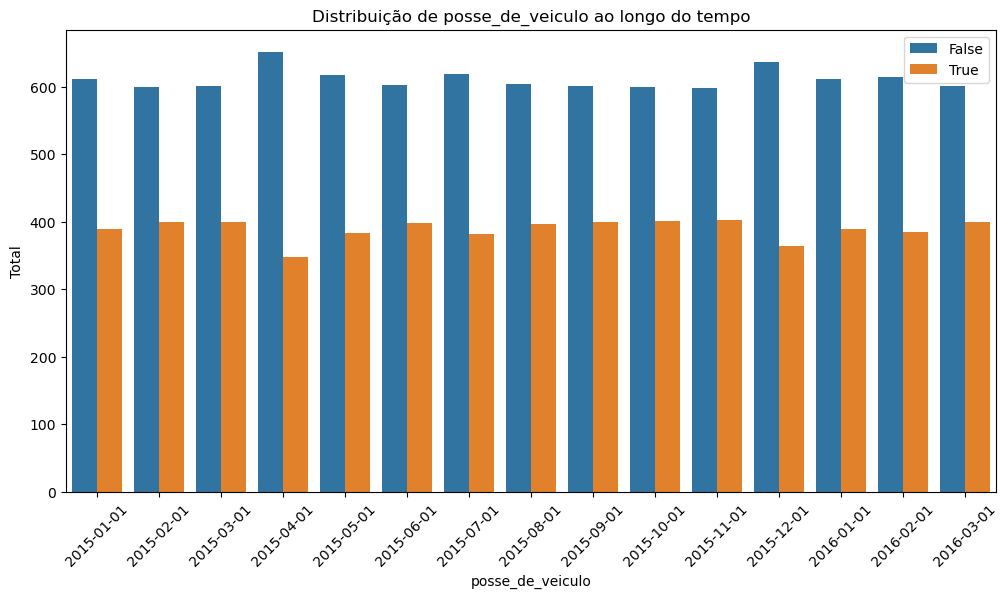

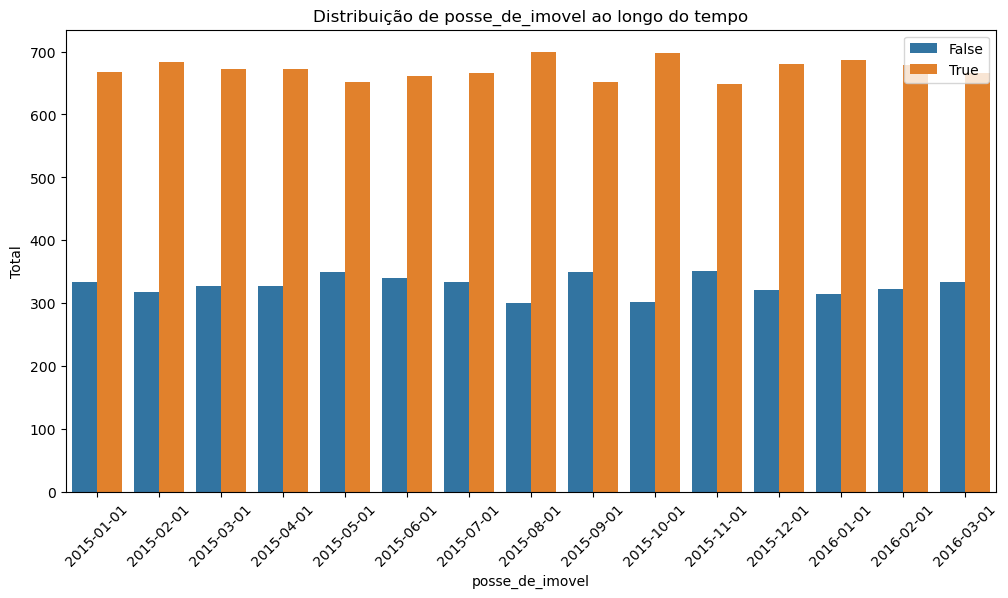

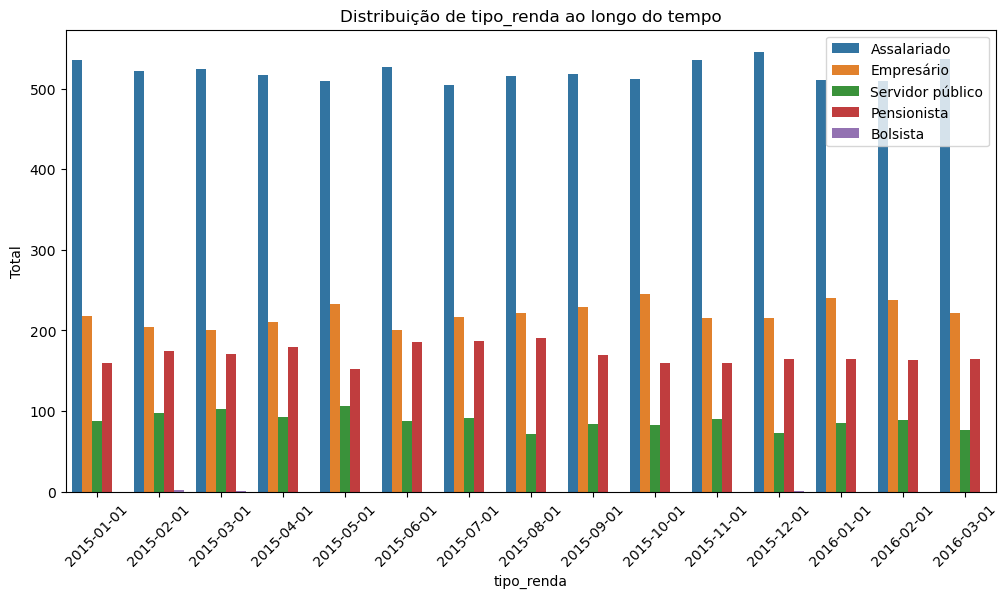

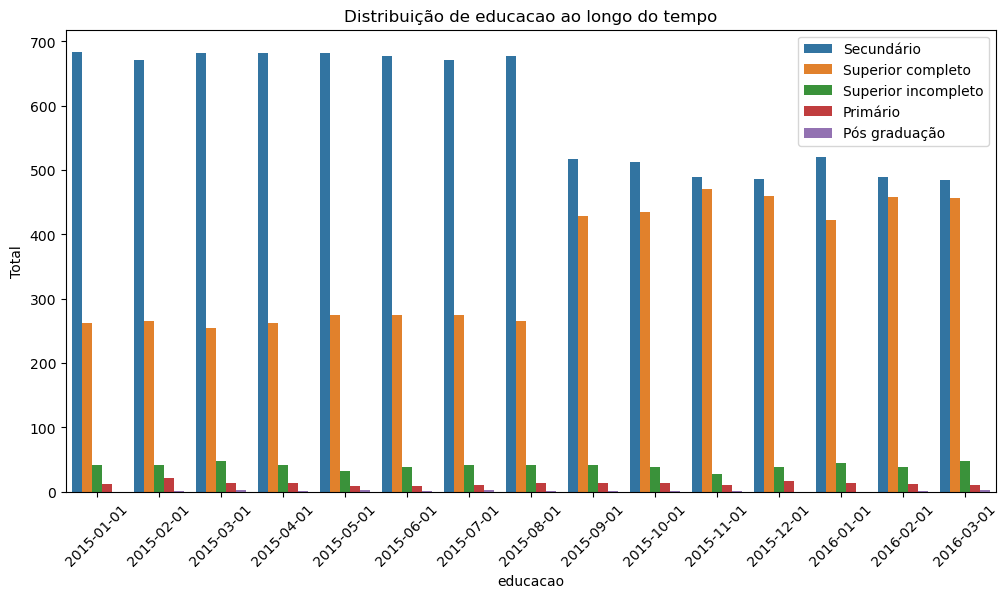

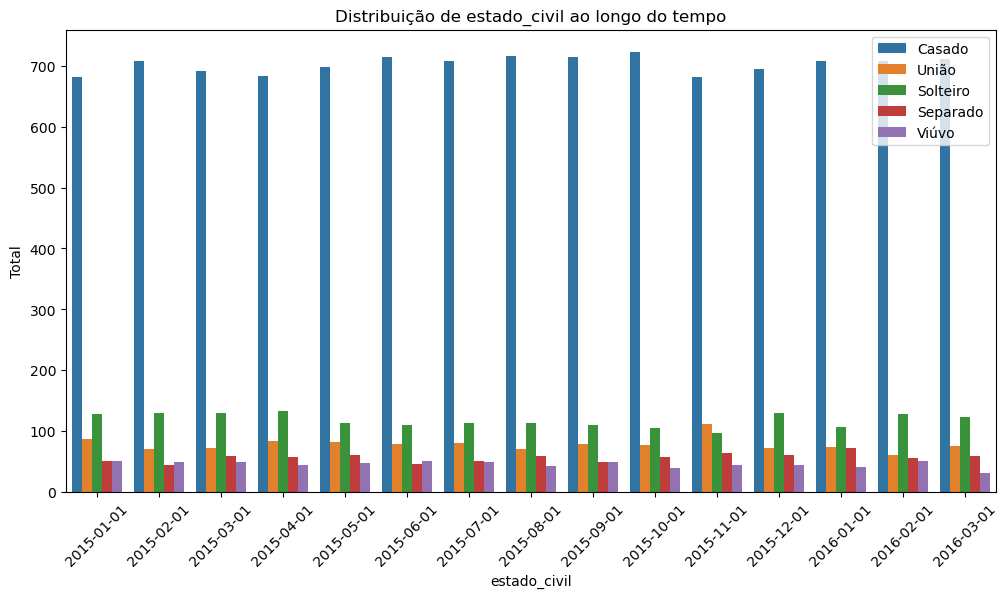

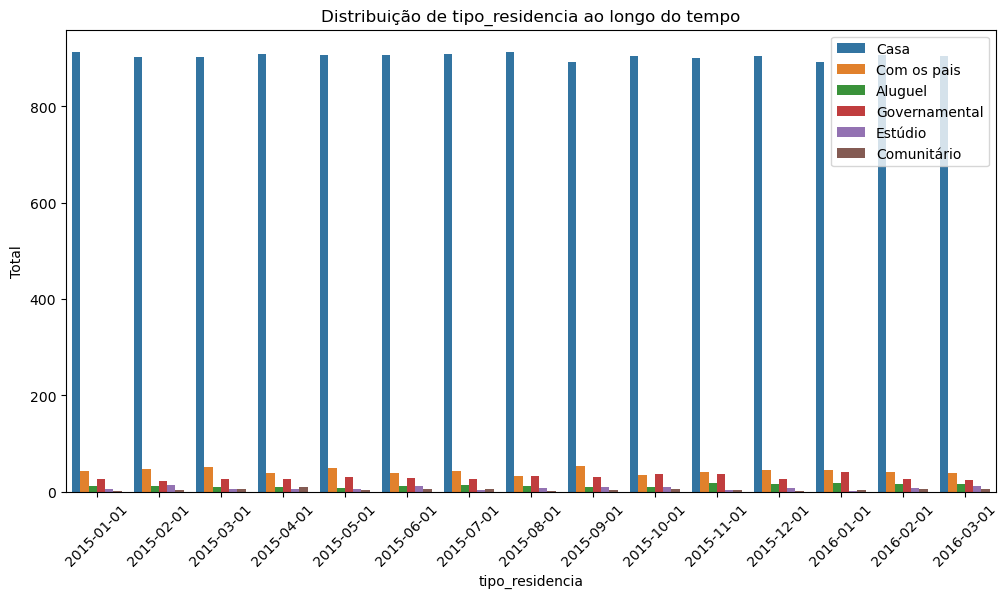

In [5]:
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
for qualitativa in qualitativas:
    plt.figure(figsize=(12, 6))
    plt.title(f'Distribuição de {qualitativa} ao longo do tempo')
    sns.countplot(x=df['data_ref'].dt.strftime('%Y-%m-%d'),  hue = qualitativa, data=df)
    plt.ylabel('Total')
    plt.xlabel(qualitativa)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

### Insight:
- Após analise de todos os gráficos, pude perceber uma alteração no gráfico 'Distribuição de educacao ao longo do tempo'. Após 01/07/2015, o número clientes com ensino superior aumentou exponencialmente e quase se igualou ao número de clientes com o secundário completo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

C:\Users\romar\AppData\Local\Temp\ipykernel_10032\3867667890.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['M', 'F'])
C:\Users\romar\AppData\Local\Temp\ipykernel_10032\3867667890.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs)


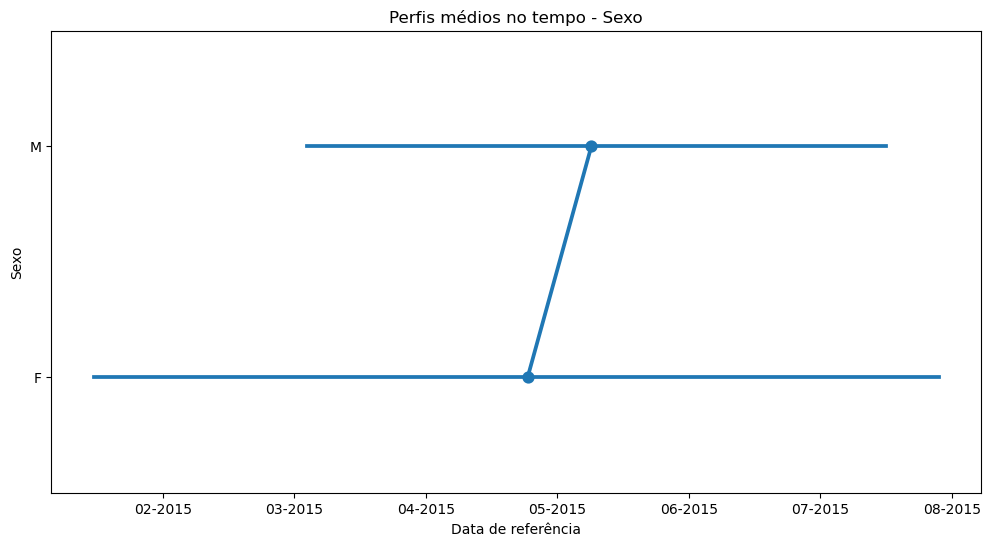

In [8]:
df['data_ref_int'] = pd.to_numeric(df['data_ref'])
plt.figure(figsize=(12, 6))

ax = sns.pointplot(x='data_ref_int', y = 'sexo',
                   data=df, dodge=True)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.set_title('Perfis médios no tempo - Sexo')
ax.set_xlabel('Data de referência')
ax.set_ylabel('Sexo')
ax.set_yticklabels(['M', 'F'])

labels = ax.set_xticklabels(tick_labs)

C:\Users\romar\AppData\Local\Temp\ipykernel_10032\2322606677.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs, rotation = 45)


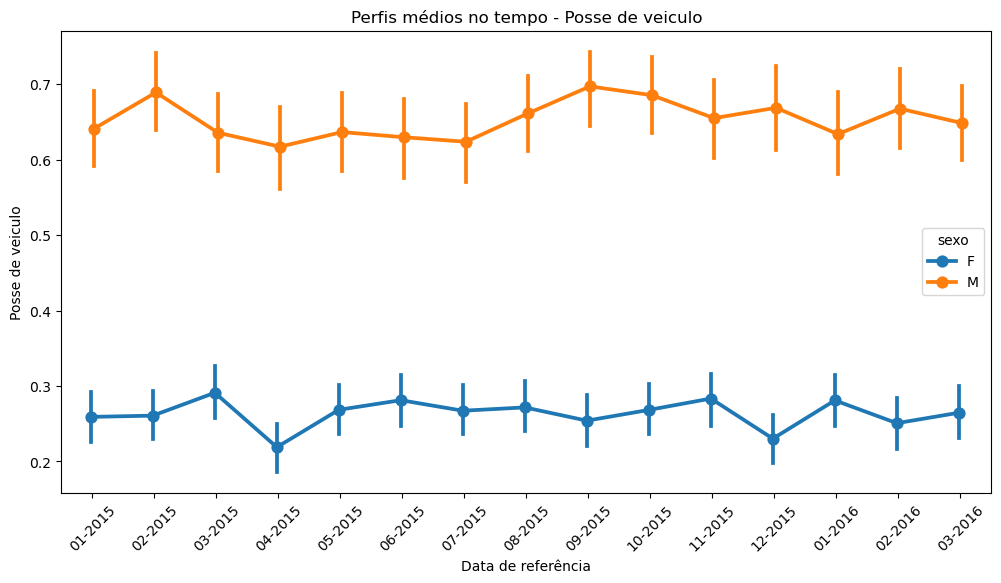

In [10]:
plt.figure(figsize=(12, 6))

ax = sns.pointplot(x='data_ref_int', y = 'posse_de_veiculo', hue ='sexo',
                   data=df, dodge=True)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.set_title('Perfis médios no tempo - Posse de veiculo')
ax.set_xlabel('Data de referência')
ax.set_ylabel('Posse de veiculo')

labels = ax.set_xticklabels(tick_labs, rotation = 45)

C:\Users\romar\AppData\Local\Temp\ipykernel_10032\3783072641.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs, rotation = 45)


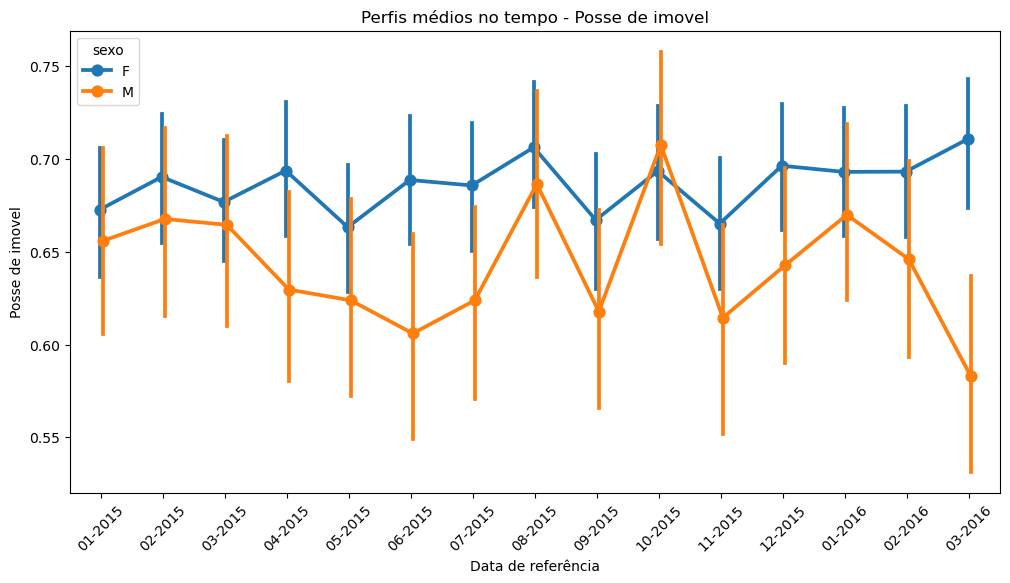

In [12]:
plt.figure(figsize=(12, 6))

ax = sns.pointplot(x='data_ref_int', y = 'posse_de_imovel', hue ='sexo',
                   data=df, dodge=True)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.set_title('Perfis médios no tempo - Posse de imovel')
ax.set_xlabel('Data de referência')
ax.set_ylabel('Posse de imovel')

labels = ax.set_xticklabels(tick_labs, rotation = 45)

C:\Users\romar\AppData\Local\Temp\ipykernel_10032\850999549.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs, rotation = 45)


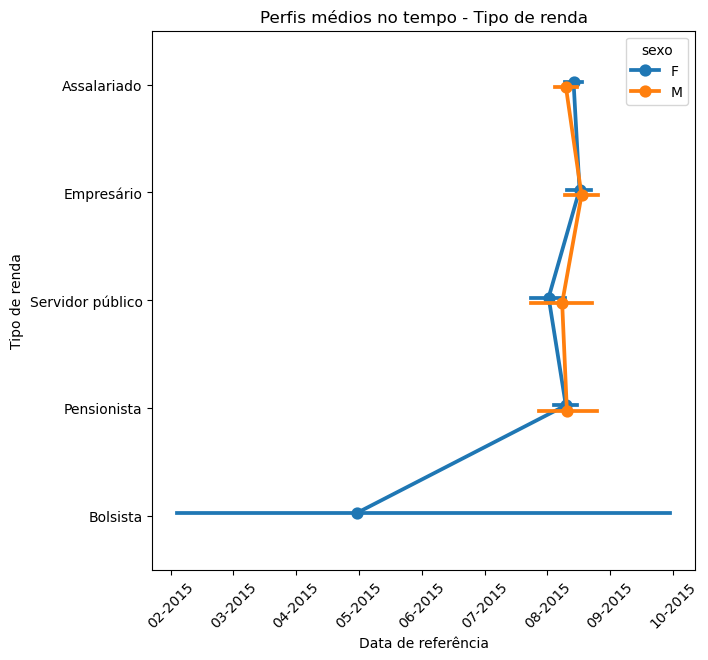

In [14]:
plt.figure(figsize=(7, 7))

ax = sns.pointplot(x='data_ref_int', y = 'tipo_renda', hue ='sexo',
                   data=df, dodge=True)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.set_title('Perfis médios no tempo - Tipo de renda')
ax.set_xlabel('Data de referência')
ax.set_ylabel('Tipo de renda')

labels = ax.set_xticklabels(tick_labs, rotation = 45)

C:\Users\romar\AppData\Local\Temp\ipykernel_10032\2625243494.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs, rotation = 45)


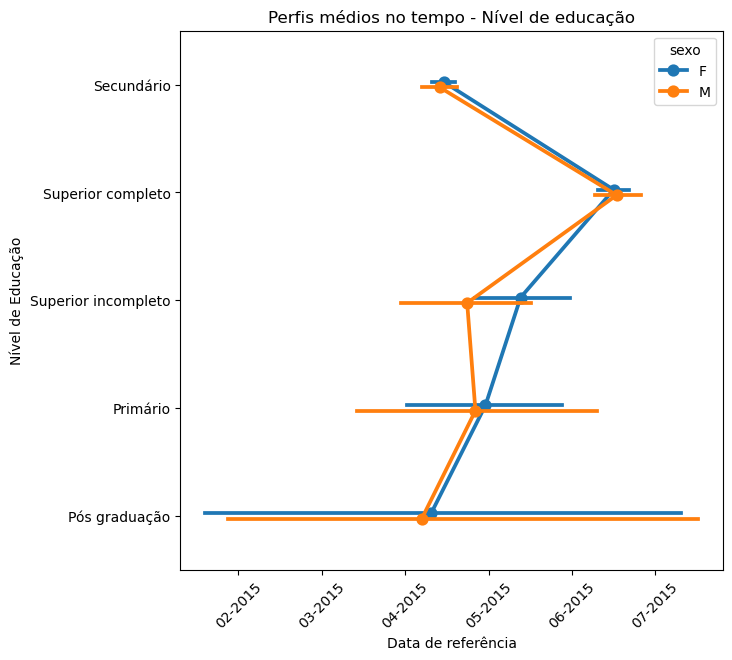

In [16]:
plt.figure(figsize=(7,7))
ax = sns.pointplot(x='data_ref_int', y = 'educacao', hue ='sexo',
                   data=df, dodge=True)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.set_title('Perfis médios no tempo - Nível de educação')
ax.set_xlabel('Data de referência')
ax.set_ylabel('Nível de Educação')

labels = ax.set_xticklabels(tick_labs, rotation = 45)

C:\Users\romar\AppData\Local\Temp\ipykernel_10032\671690336.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs, rotation = 45)


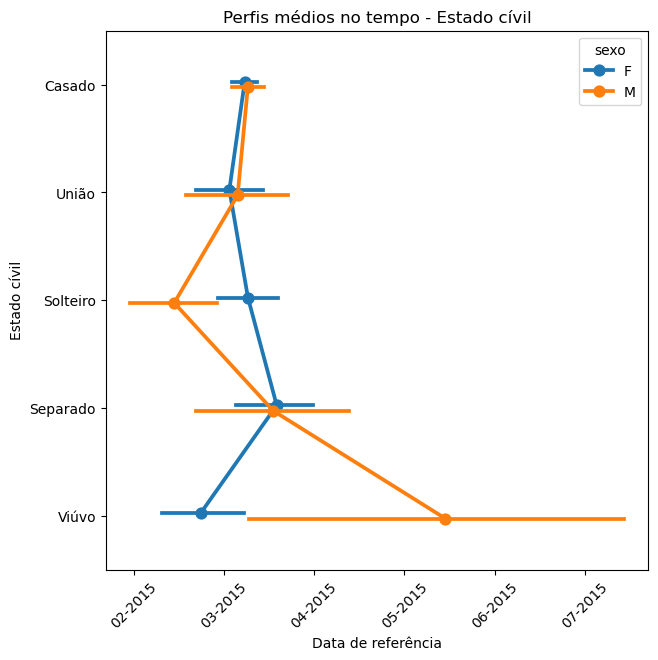

In [18]:
plt.figure(figsize=(7,7))
ax = sns.pointplot(x='data_ref_int', y = 'estado_civil', hue ='sexo',
                   data=df, dodge=True)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.set_title('Perfis médios no tempo - Estado cívil')
ax.set_xlabel('Data de referência')
ax.set_ylabel('Estado cívil')

labels = ax.set_xticklabels(tick_labs, rotation = 45)

C:\Users\romar\AppData\Local\Temp\ipykernel_10032\3320476223.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_xticklabels(tick_labs, rotation = 45)


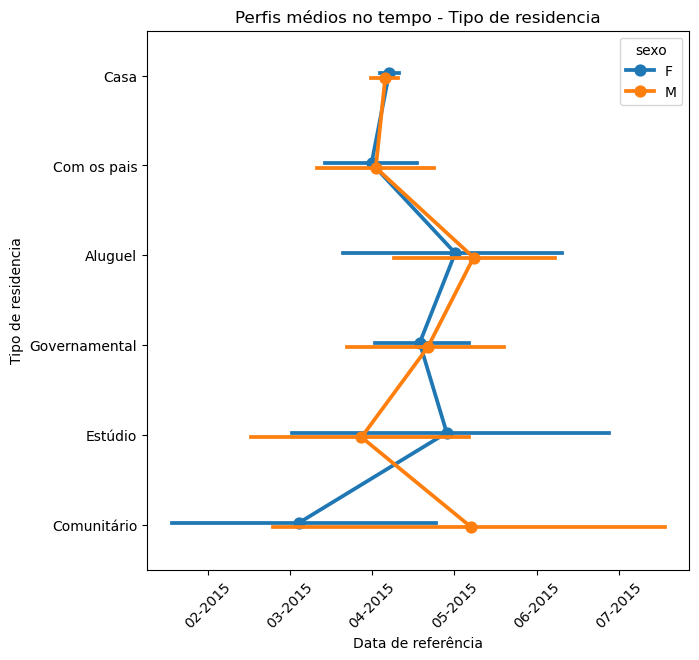

In [20]:
plt.figure(figsize=(7,7))

ax = sns.pointplot(x='data_ref_int', y = 'tipo_residencia', hue ='sexo',
                   data=df, dodge=True)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ax.set_title('Perfis médios no tempo - Tipo de residencia')
ax.set_xlabel('Data de referência')
ax.set_ylabel('Tipo de residencia')

labels = ax.set_xticklabels(tick_labs, rotation = 45)

### Insight:
- Após analisarmos os gráficos com os perfis médios no tempo, verificamos que a variável 'educação' pode significar que a população está instável ou que a população está mudando.